# Midterm

## Kunal Naidu
## UCID: 30020999

# Introduction

In this report we will be working with Chebyshev Polynomials and exploring their orthongonal characteristics with. Also we will be looking at and creating Lissajous Figures.

## Chebyshev Polynomials

Chubyshev Polynomials are solutions to the Chebyshev differential equations



\begin{align}
(1-x^2)y''-xy'+n^2y=0
\end{align}

and 

\begin{align}
(1-x^2)y''-3xy'+n(n+2)y=0
\end{align}


Chebyshev polynomials of the first kind can be defined by the recurrence realtion 

\begin{align}
T_0(x) &= 1 \\
T_1(x) &= x \\
T_{n+1}(x) &= 2xT_n(x)-T_{n-1}(x)
\end{align}


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import time

In [2]:
def Chebyshev1_recur(x,n):
    """
    Evaluates Chebyshev polynomials of the first kind for specific values of x
    
    Parameters
    ----------
    x: the value of x where the Chebyshev polynomials is evaluated at
    
    n: the degree of the Chebyshev polynomial
    
    Returns
    --------
    
    Value of certain Chebyshev polynomial of certain degree evaluated for a certain value of x
    
    """
    if n == 0.0:
        result =1.0
    elif n== 1.0:
        result= x
    else:
        T_0=1.0
        T_1= x
        a=1.0
        while a < n:
            T_2 = 2.0*x*T_1-T_0
            result= T_2
            T_0=T_1
            T_1=T_2
            a=a+1.0
    return result

In [3]:
print(Chebyshev1_recur(2.0,3.0))

26.0


Refering to Wolfram Alpha we know that the third degree Chebyshev polynomials of the first kind are 

\begin{align}
T_3(x) &=4x^3-3x \\
T_3(2) &=4*2^3-3*2 \\
&= 26
\end{align}


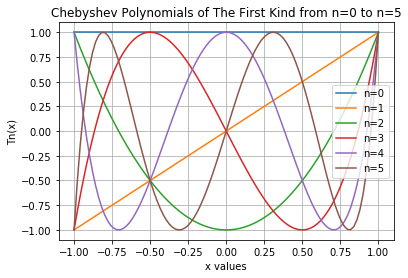

In [4]:
#creating x values
x_values= np.linspace( -1.0, +1.0, 100)
data={}
T_0=[]


for values in range(0,100):
    T_0.append(1)
    
data[0]= T_0

for Coe in [1, 2, 3, 4, 5]:
    data[Coe]= Chebyshev1_recur(x_values,Coe)

for n,l in zip( data.keys(), ['n=0','n=1','n=2','n=3','n=4','n=5']):
    plt.plot( x_values, data[n],label=l)

    
#graph layout
plt.grid('on')
plt.title('Chebyshev Polynomials of The First Kind from n=0 to n=5')
plt.xlabel('x values')
plt.ylabel('Tn(x)')
plt.legend(loc=0)

## Orthogonality

Chebyshev polynomials of the first kind are orthogonal over the range [-1,1] The weighted integral inner product is given by 

$$ \int\limits_{-1}^{+1} \frac{T_n(x) \; T_m(x)}{\sqrt{1-x^2}} \; dx \;=\; \frac{1}{2}\pi\;\delta_{n,m} \qquad n\ne 0, m\ne 0$$

where the Kroneker delta function $\delta_{i,j}$ is 1 if i=j and is zero otherwise

In [5]:
def integrand(x,n,m):
    return (Chebyshev1_recur(x, n)*Chebyshev1_recur(x, m))/np.sqrt(1-x*x)

In [6]:
def orthogonality(N):
    """
    Evaluates the weighted integral inner product using numerical integration
    
    Parameters
    ----------
    
    N: Largest value of n
    
    Returns
    --------
    
    value of the weighted integral of the inner product
    
    """
    data=[]
    for a in range(1, N+1):
        for b in range(1,N+1):
            if a<=b:
                result= integrate.quad(integrand, -1, 1, args=(a,b))
                if result[1] >= result[0]:
                    data.append(0.0)
                else:
                    data.append(result[0])
            else:
                pass
    return data

In [7]:
experimental= orthogonality(5)[len(orthogonality(5))-1]
print('using our othognality function we get ', experimental)

theoredical=1/2*np.pi*1

print('Looking at the equation with delta we get' , theoredical )

error= abs((experimental-theoredical)/theoredical)*100

print('the values have an error of ' ,error, '%')

using our othognality function we get  1.5707963267933613
Looking at the equation with delta we get 1.5707963267948966
the values have an error of  9.77349114117278e-11 %


In [8]:

%timeit orthogonality(20)


728 ms ± 91.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
% timeit theoredical=1/2*np.pi*1

125 ns ± 5.8 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


## Lissajous Figures

Lissajous curve is the graph of a system of parametric equations

\begin{align}
x &= Asin(at+\delta) \\
y &= Bsin(bt) \\
\end{align}

The figure is highly sensitive to the ratio of $\frac{a}{b}$. Rational ratios produce closed (connected) or "still" figures, and irrational ratios produces figures that appear to rotate.

In this case we are gonna assume that A=B=1,a=3, and b=7.


Text(0.5,1,'Lissajous Figure for $\\delta=0$')

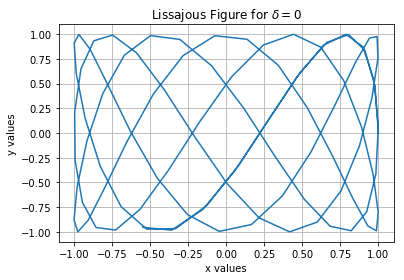

In [10]:

t=np.linspace(0.0,7,100)

x= np.sin(3.0*t+(np.pi/2))

y= np.sin(7.0*t)

plt.plot(x,y,)
plt.grid('on')

plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Lissajous Figure for $\delta=0$')


In [11]:
def x_prime(t):
    result=3.0*np.cos(3.0*t)
    return result
def y_prime(t):
    result=7.0*np.cos(7.0*t)
    return result

result=0.0
for time in t:
    v= np.sqrt(x_prime(time)*x_prime(time)+y_prime(time)*y_prime(time))
    if v >= result:
        result=v
        result_time= time
    else:
        pass
print('The maximum speed of an object is ', result, 'at time ', result_time)

The maximum speed of an object is  7.615773105863909 at time  0.0


Lissajous figures where A=B=1, a=1, b=N (N being a natural number) and

\begin{align}
\delta &= \frac{N-1}{N}\frac{\pi}{2}
\end{align}

y(x) can be shown to be Chebyshev polynomials of the first kind with degree N.

In [12]:
def x_k(n):
    """
    x values for a certain n
    
    Parameters
    ----------
    
    n: certain value of n
    
    Returns
    --------
    
    list of x values for a certain value of n
    
    """
    result=[]
    for values in range(1,n+1):
        x= np.cos(((2.0*values-1)*np.pi)/(2.0*n))
        result.append(x)
    return result

print(x_k(5))

result_Cheby=[]
for values in x_k(5):
    result_Cheby.append(Chebyshev1_recur(values,5))
print(result_Cheby)



[0.9510565162951535, 0.5877852522924732, 6.123233995736766e-17, -0.587785252292473, -0.9510565162951535]
[-4.440892098500626e-16, -7.771561172376096e-16, 3.0616169978683826e-16, -7.771561172376096e-16, 4.440892098500626e-16]


In [13]:
result_Lissajous=[]
for values in x_k(5):
    result_Lissajous.append(np.sin(5*values))
print(result_Lissajous)

[-0.9990802105294263, 0.20128186327204947, 3.061616997868383e-16, -0.20128186327205078, 0.9990802105294263]


In [14]:
difference=[]
for values in range(0,len(result_Cheby)):
    difference.append(result_Cheby[values]-result_Lissajous[values])
print(difference)

[0.9990802105294259, -0.20128186327205025, -4.930380657631324e-32, 0.20128186327205, -0.9990802105294259]


from IPython.display import Latex
Latex(r"""\begin{eqnarray}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0 
\end{eqnarray}""")

In [15]:
percent_diff=[]
for values in range(0,len(difference)):
    percent_diff.append((abs(difference[values]/result_Cheby[values])*100))
print(percent_diff)

[2.2497286319267795e+17, 2.5899797840812704e+16, 1.610384532442839e-14, 2.589979784081267e+16, 2.2497286319267795e+17]


In [16]:
for values in range(0,len(percent_diff)):
    print('percent difference for value ', values+1, 'is ', percent_diff[values])

percent difference for value  1 is  2.2497286319267795e+17
percent difference for value  2 is  2.5899797840812704e+16
percent difference for value  3 is  1.610384532442839e-14
percent difference for value  4 is  2.589979784081267e+16
percent difference for value  5 is  2.2497286319267795e+17


# Discussion

The function made to evaluate Chebyshev polynomials was checked with assumed theoredical values from Wolfram Alpha. We found them to be exact and thus we can say that the function gives us accurate results. 

Looking at the Lissajous figure we were able to see a distinct pattern and due to this we can also be fairly confident that our function does it's job. 

Now looking to see if the functions are connected, the chebyshev polynomials at n=5 were almost all significantly smaller than the lissajous figure for the similar value. Almost all the values had a significant percent difference of more than $1*10^{16}\%$. The only similar value was at $x= 6.123*10^{-17}$ where the chebyshev and the lissjous had a percent difference of $1.61*10^{-14}\%$. Due to the majority of values being significantly different from eachother, we can not validate this claim and can not say that the Lissajous figures and Chebyshev polynomials of the first kind with degree N are the same.


# Conclusion

The function made to evaluate the Chebyshev polynomials evaluated the Chebyshev polynomial at $x=2$ and $n=3$ to be 26. This was exactly the value that was obtained when comparing to Wolfram Alpha. 

Calculating the weighted integral inner product when looking at the orthoganality characteristic, we calculated a value of 1.5707963. The theoredical value using the equation $\frac{1}{2}\pi\;\delta_{n,m}$ and was determined to be 1.5707963. Comparing the experimental to the theoredical, we can see there was an error of $9.773*10^{-11} \%$. The largest value of N which could be calculated in a reasonable amount of time using the orthogonality function was $N=20$ which took 580 ms ± 17.2 ms. Without creating a function that calculates $\frac{1}{2}\pi\;\delta_{n,m}$ exactly, we can instead figure out the time to do the calculations the function would need to do. The time to make the calculation of $\frac{1}{2}\pi*1$ took 108 ns ± 4.56 ns. Using the equation $\frac{1}{2}\pi\;\delta_{n,m}$ resulted in a more time efficient way of calulating the weighted integral product and also was fairly accurate with a very small error. 

Looking at the Lissajous figures we found the maximum speed of the object to be 7.615773105 at time 0.0. 

When seeing if the Chebyshev polynomials and Lissajous figures are connected similarly as in the discussion, the difference between the values were very large except for the value of $x= 6.123*10^{-17}$ where the difference was -4.9304*10^{-32}. Although one x value was very simlar, we can not support the claim that Chebyshev polynomials and Lissajous figures are connected. 